In [ ]:
import pandas as pd
import random

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/clustering1804127.csv')
X = data['X'].values
Y = data['Y'].values
Z = data['Z'].values
print(data)

     X   Y   Z
0    1   2  10
1    2  14  23
2   13   2   4
3   12  13  22
4    3  14  18
5   12  17   7
6   19   3   6
7   16  17  18
8   21   5  15
9   11   1  20
10  32  10  10
11  18  25  10
12  10  16  13
13  45  31  21
14   0   0   0


In [ ]:
def init_centroids(X, Y, Z, K):
    cent = []
    j=int(0)
    for i in range(K):
        cent.append((X[j], Y[j], Z[j]))
        j=j+1
    return cent

In [ ]:
def ass_clusters(X, Y, Z, cent):
    clusters = []
    for i in range(len(cent)):
        clusters.append([])

    for i in range(len(X)):
        point = (X[i], Y[i], Z[i])
        distances = []
        for c in cent:
             distance = math.sqrt((point[0] - c[0]) ** 2 + (point[1] - c[1]) ** 2  + (point[2] - c[2]) ** 2)
             distances.append(distance)

        min_distance = float('inf')
        nearest_centroid = 0
        for i in range(len(distances)):
            if distances[i] < min_distance:
                min_distance = distances[i]
                nearest_centroid = i

        clusters[nearest_centroid].append(point)

    return clusters

In [ ]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:

        sum_x = 0
        sum_y = 0
        sum_z = 0
        for point in cluster:
          sum_x += point[0]
          sum_y += point[1]
          sum_z += point[2]
          centroid_x = sum_x / len(cluster)
          centroid_y = sum_y / len(cluster)
          centroid_z = sum_z / len(cluster)

        centroids.append((centroid_x,centroid_y, centroid_z))
    return centroids

Enter the value of K: 3


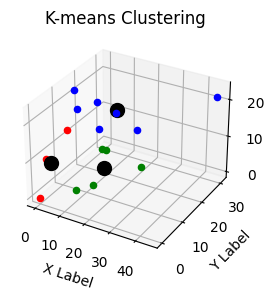

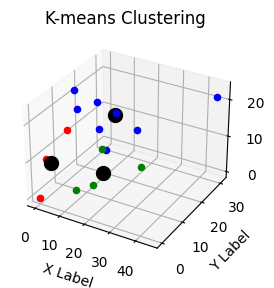

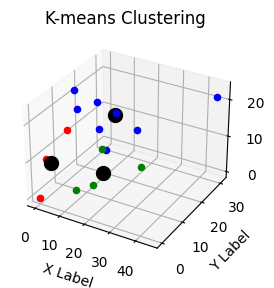

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def k_means_clustering(X, Y,Z, K):
    cent = init_centroids(X, Y, Z, K)
    prev_centr = []
    while cent != prev_centr:
        clusters = ass_clusters(X, Y, Z, cent)
        prev_centr = cent
        cent = update_centroids(clusters)
        colors = ['red',  'blue', 'green','yellow',"silver","orange","green","violet","aqua","cyan"]
        fig=plt.figure(figsize=(3, 3))

        counter = 0
        ax = fig.add_subplot(111, projection='3d')
        for cluster in clusters:
            for point in cluster:
                ax.scatter(point[0], point[1],point[2], c=colors[counter], marker='o')
            counter += 1

        for centroid in cent:
            ax.scatter(centroid[0], centroid[1],centroid[2], c='black', marker='o', s=100)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        plt.title('K-means Clustering')
        plt.show()
    return clusters, cent


K = int(input("Enter the value of K: "))
clusters, centroids = k_means_clustering(X, Y, Z, K)